In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

In [ ]:
!unzip brain-tumor-mri-dataset.zip

In [1]:
import os
import cv2
import time
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
training_set = '/content/Training'
testing_set = '/content/Testing'

In [3]:
input_shape = (224, 224, 3)

In [4]:
# Initializing the Neural Network Model using Tensorflow and Keras
# This is an Alternative way of initializing the Neural Network
'''
from tf.keras.models import Sequential
model = Sequential()
'''

# I chose this line of code which in fact efficient to read and run
BTD = tf.keras.models.Sequential()

#BTD Stands for "Brain Tumor Detection"

In [5]:
BTD.add(Conv2D(32, (3,3), input_shape = input_shape, activation = 'relu'))
BTD.add(Conv2D(32, (3,3), input_shape = input_shape, activation = 'relu'))
BTD.add(MaxPooling2D(pool_size = (2,2)))

In [6]:
BTD.add(Conv2D(32, (3,3), input_shape = input_shape, activation = 'relu'))
BTD.add(Conv2D(32, (3,3), input_shape = input_shape, activation = 'relu'))
BTD.add(MaxPooling2D(pool_size = (2,2)))

In [7]:
BTD.add(Conv2D(64, (3,3), input_shape = input_shape, activation = 'relu'))
BTD.add(Conv2D(64, (3,3), input_shape = input_shape, activation = 'relu'))
BTD.add(Conv2D(64, (3,3), input_shape = input_shape, activation = 'relu'))
BTD.add(MaxPooling2D(pool_size = (2,2)))

In [8]:
BTD.add(Conv2D(64, (3,3), input_shape = input_shape, activation = 'relu'))
BTD.add(Conv2D(64, (3,3), input_shape = input_shape, activation = 'relu'))
BTD.add(Conv2D(64, (3,3), input_shape = input_shape, activation = 'relu'))
BTD.add(MaxPooling2D(pool_size = (2,2)))

In [9]:
BTD.add(Flatten())

In [10]:
BTD.add(Dense(512, activation = 'relu'))
BTD.add(Dense(256, activation = 'relu'))

# Dropout layer with droupout rate set to 0.5
BTD.add(Dropout(0.5))
BTD.add(Dense(128, activation = 'relu'))
BTD.add(Dense(64, activation = 'relu'))
BTD.add(Dense(4, activation = 'softmax'))

# Compiling the Neural Network
BTD.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
BTD.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 32)        0         
 g2D)                                                   

In [12]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
                                          rotation_range = 40,
                                          height_shift_range = 0.2,
                                          width_shift_range = 0.2,
                                          shear_range = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip = True,
                                          fill_mode = 'nearest')

In [13]:
# Data augmentation is applied to training images using a batch size of 32, and the order of images is randomized
# The images will undergo resizing to dimensions of (150, 150)
# Since this is a categorical classification problem, the class mode is set to 'categorical'
# The labels will be one-hot encoded

training_images = image_data_generator.flow_from_directory(training_set,
                                                           batch_size = 32,
                                                           target_size = (224, 224),
                                                           shuffle = True,
                                                           class_mode = 'categorical')

Found 5712 images belonging to 4 classes.


In [14]:
validation_data_generator = ImageDataGenerator(rescale = 1./255)

In [15]:
testing_images = validation_data_generator.flow_from_directory(testing_set,
                                                               batch_size = 32,
                                                               target_size = (224, 224),
                                                               shuffle = False,
                                                               class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [16]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}

        val_accuracy = logs.get('val_accuracy')
        if val_accuracy is not None and val_accuracy >= 0.95:
          print("\n")
          print(f"\nValidation accuracy reached {val_accuracy * 100:.2f}%. Training is stopped.")
          self.model.stop_training = True

custom_callback = CustomCallback()

In [17]:
start_time = time.time()

BTD.fit(training_images,
        epochs = 1000,
        steps_per_epoch = len(training_images),
        validation_data = testing_images,
        callbacks = [custom_callback])

end_time = time.time()

Epoch 1/1000
179/179 [==============================] - 109s 489ms/step - loss: 1.2190 - accuracy: 0.3880 - val_loss: 1.4853 - val_accuracy: 0.3760
Epoch 2/1000
179/179 [==============================] - 84s 470ms/step - loss: 1.0605 - accuracy: 0.4830 - val_loss: 1.0149 - val_accuracy: 0.4836
Epoch 3/1000
179/179 [==============================] - 87s 485ms/step - loss: 1.0508 - accuracy: 0.4926 - val_loss: 1.0378 - val_accuracy: 0.4859
Epoch 4/1000
179/179 [==============================] - 83s 464ms/step - loss: 1.0283 - accuracy: 0.5172 - val_loss: 1.1900 - val_accuracy: 0.4508
Epoch 5/1000
179/179 [==============================] - 82s 461ms/step - loss: 0.9727 - accuracy: 0.5795 - val_loss: 1.0107 - val_accuracy: 0.5324
Epoch 6/1000
179/179 [==============================] - 83s 465ms/step - loss: 0.9289 - accuracy: 0.6028 - val_loss: 0.9857 - val_accuracy: 0.5538
Epoch 7/1000
179/179 [==============================] - 82s 460ms/step - loss: 0.8839 - accuracy: 0.6271 - val_loss: 

In [18]:
total_time = end_time - start_time
print(f"Total time taken for training: {total_time:.2f} seconds")

Total time taken for training: 7469.82 seconds


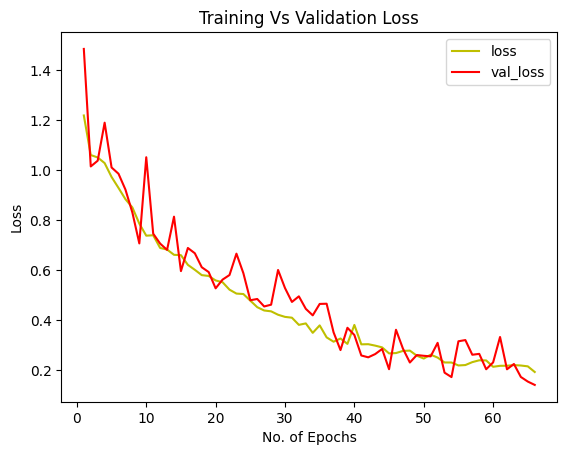

In [19]:
  # Training Loss Vs Validation Loss
# I have mentioned two different ways to plot the graphs, please take a look on both
loss = BTD.history.history['loss']
val_loss = BTD.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'loss')
plt.plot(epochs, val_loss, 'r', label = 'val_loss')
plt.title('Training Vs Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

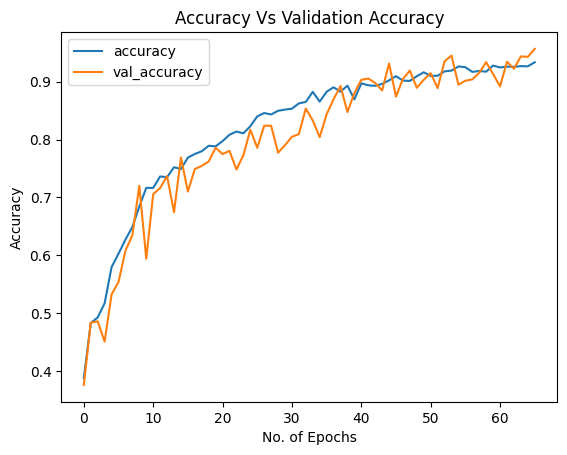

In [20]:
# Accuracy Vs Validation Accuracy
# This is other way of plotting the plot
losses = pd.DataFrame(BTD.history.history)
losses[['accuracy','val_accuracy']].plot()
plt.title('Accuracy Vs Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

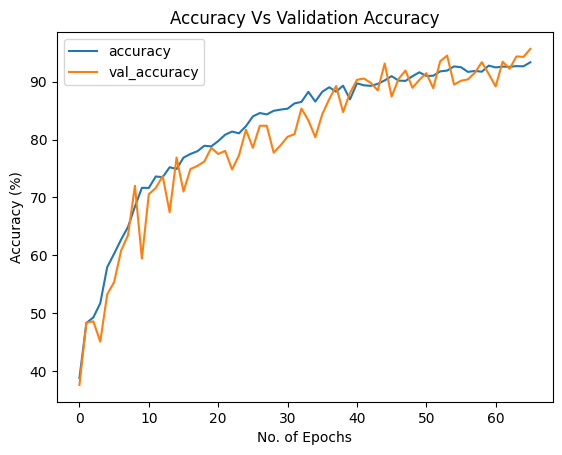

In [21]:
losses = pd.DataFrame(BTD.history.history)
losses[['accuracy', 'val_accuracy']] *= 100  # Convert to percentage
losses[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy Vs Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy (%)')  # Modify the y-axis label
plt.legend()
plt.show()

In [22]:
predictions = BTD.predict(testing_images)
print(predictions)

41/41 [==============================] - 4s 79ms/step
[[6.6496754e-01 1.7640497e-01 4.9160156e-02 1.0946737e-01]
 [8.8527375e-01 3.1007105e-02 6.2181139e-03 7.7501006e-02]
 [9.4950992e-01 9.1086077e-03 1.2128068e-03 4.0168609e-02]
 ...
 [4.7362912e-05 2.9285313e-03 2.1943364e-02 9.7508061e-01]
 [4.4004978e-03 6.1838415e-02 2.0309085e-02 9.1345203e-01]
 [1.2786946e-03 5.5496641e-02 2.8935191e-03 9.4033110e-01]]


In [23]:
print(BTD.evaluate(testing_images))

41/41 [==============================] - 3s 81ms/step - loss: 0.1403 - accuracy: 0.9565
[0.14031320810317993, 0.95652174949646]


Found 1311 images belonging to 4 classes.
Total number of samples: 1311


Number of batches: 40
40/40 [==============================] - 3s 67ms/step
40 Batches are processed


Number of batches: 41
41/41 [==============================] - 3s 65ms/step
41 Batches are processed (Same Batches)


Number of batches: 41
41/41 [==============================] - 3s 75ms/step
41 Batches are processed (Same Batches)


True Labels: 1311
Predicted Labels: 1311


First Matrix is Normalized Confusion Matrix

Second Confusion Matrix is Without Normalization


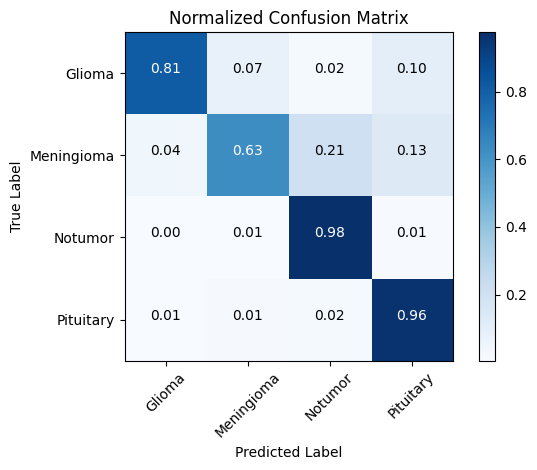

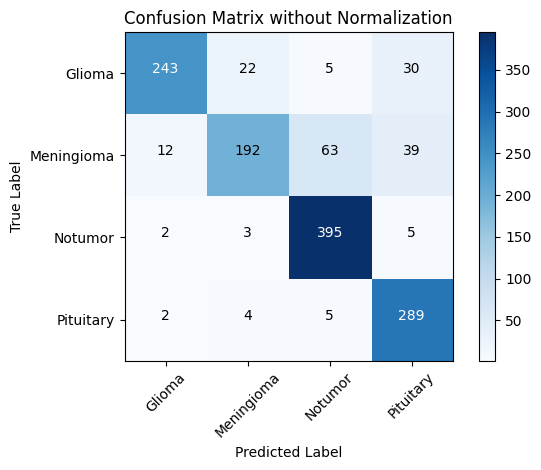

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    testing_set,
    target_size=(192, 192),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle=False
)

true_labels = test_generator.classes
num_samples = len(true_labels)

num_batches = num_samples // test_generator.batch_size
print("Total number of samples:", num_samples)
print("\n")

print("Number of batches:", num_batches)
predictions = BTD.predict(test_generator, steps = num_batches, verbose = 1)
# When verbose = 1, it will show a progress bar during the prediction
print("40 Batches are processed")
print("\n")
print("Number of batches:", num_batches + 1)
predictions = BTD.predict(test_generator, steps = num_batches + 1, verbose = 1)
print("41 Batches are processed (Same Batches)")
print("\n")
print("Number of batches:", num_batches + 1)
predictions = BTD.predict(test_generator, steps = num_samples // test_generator.batch_size + 1, verbose = 1)
predicted_labels = np.argmax(predictions, axis = 1)
print("41 Batches are processed (Same Batches)")
print("\n")

actual_label = len(true_labels)
pred_label = len(predicted_labels)
print(f"True Labels: {actual_label}\nPredicted Labels: {pred_label}")
cm = confusion_matrix(true_labels, predicted_labels)
class_names = ["Glioma", "Meningioma", "Notumor", "Pituitary"]

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("\n")
        print("First Matrix is Normalized Confusion Matrix\n")
    else:
        print('Second Confusion Matrix is Without Normalization')

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cm, classes = class_names, normalize = True, title = 'Normalized Confusion Matrix')

plt.figure()
plot_confusion_matrix(cm, classes = class_names, normalize = False, title = 'Confusion Matrix without Normalization')

plt.show()